<ErrorbarContainer object of 3 artists>

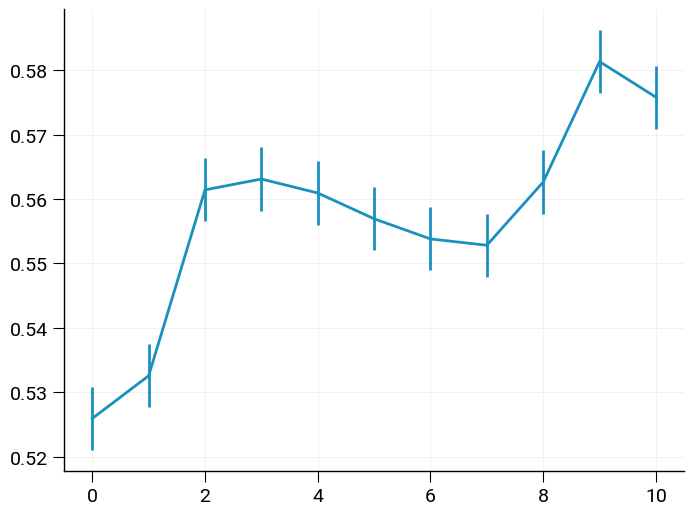

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import sem
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))

subjects = ["p1", "p2", "p3", "p4", "p5"]

DIR_DATA = "/data/pt_01880/Experiment1_ODC/paper/decoding"

y_mean = []
for subj in subjects:
    path = Path(DIR_DATA) / subj
    aha = path.glob("V*")
    for i in aha:
        file = i / "bandpass_none/accuracy.csv"
        data = np.genfromtxt(file, delimiter=',')
        nlayer = np.shape(data)[0]

        y = np.zeros(nlayer)
        for j in range(nlayer):
            y[j] = np.mean(data[j, :])


        y_mean.append(y)

y_mean = np.array(y_mean)
y_mean = np.mean(y_mean, axis=0)
y_sem = sem(y_mean, axis=0)

plt.errorbar(np.arange(nlayer), y_mean, y_sem, fmt='.-')
